In [1]:
import torch
import pco
from pco.graphics import plot_heatmap, Quadratic, pareto

import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
# Optional preamble for packages/macros:
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb} \newcommand{\R}{\mathbb{R}}'

# Example where PNG is not preference optimal

In [22]:
def F(x):
    v1 = torch.tensor([1.,0.])
    v2 = torch.tensor([-1.,0.])
    H = torch.tensor([[1.,1.],[1.,2.]])
    return torch.stack([0.5 * (x - v1) @ H @ (x - v1), 
                        0.5 * (x - v2) @ H @ (x - v2)])

def f0(x):
    v0 = torch.tensor([0., 1.])
    return 0.5 * (x - v0) @ (x - v0)

OPT = [0., 0.]

In [ ]:
x0 = torch.tensor([1.,1.75])
beta0 = torch.tensor([1.,0.])
solver_pmm = pmm.PMM(F, f0, x0, beta0)
solver_pmm.solve()
X_pmm = torch.stack(solver_pmm.history)

In [ ]:
solver_png = pmm.PNG(F, f0, x0, threshold=0.001, lr=0.1)
solver_png.solve(iters=40000)
X_png = torch.stack(solver_png.history)

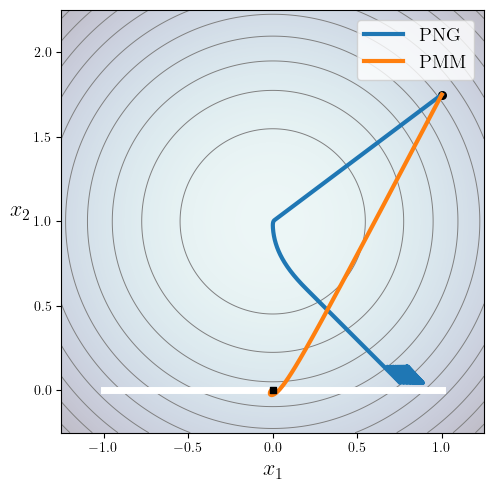

In [33]:
# plot heatmap
fig, ax = plot_heatmap(f0, xlim=(-1.25,1.25), ylim=(-0.25,2.25), cmap=cmap)

# plot Pareto set
plt.plot([-1,1], [0,0], linewidth=5, c='white')

# plot trajectories
plt.plot(X_png[:,0], X_png[:,1], linewidth=3, label=r'PNG', zorder=5)
plt.plot(X_pmm[:,0], X_pmm[:,1], linewidth=3, label=r'PMM', zorder=6)

# plot initial and optimal
plt.scatter([OPT[0]], [OPT[1]], c='black', s=25, zorder=7, marker=',')
plt.scatter([x0[0]], [x0[1]], c='black', s=30, zorder=4)

plt.legend(fontsize=14) 
plt.show()

# Example with non-smooth Pareto set

In [6]:
v0 = torch.tensor([0.2, 0.75])
v1 = torch.tensor([0.0,0.0])
v2 = torch.tensor([1.0,0.5])
v3 = torch.tensor([0.5,1.0])

A0 = torch.tensor([[1.,0.35],[0.35,2]])
A1 = torch.tensor([[1.,0.],[0.,1.]])
A2 = torch.tensor([[0.25,0.],[0.,1.]])
A3 = torch.tensor([[1.,0.],[0.,0.25]])

q0 = Quadratic(A0, v0)
q1 = Quadratic(A1, v1)
q2 = Quadratic(A2, v2)
q3 = Quadratic(A3, v3)

xs1, ys1 = pareto(q1, q2)
xs2, ys2 = pareto(q2, q3)
xs3, ys3 = pareto(q3, q1)

def F_ns(x):
    return torch.stack([0.5 * (x - v1) @ A1 @ (x - v1), 
                        0.5 * (x - v2) @ A2 @ (x - v2),
                        0.5 * (x - v3) @ A3 @ (x - v3)
                        ])

def f0_ns(x):
    return 0.5 * (x - v0) @ A0 @ (x - v0)

OPT_ns = [0.44749999046325684, 0.6806083917617798]

In [ ]:
x0_ns = torch.tensor([0.,0.])
beta0_ns = torch.tensor([1.,0.,0.])
solver_pmm_ns = pmm.PMM(F_ns, f0_ns, x0_ns, beta0_ns)
solver_pmm_ns.solve()
X_pmm_ns = torch.stack(solver_pmm_ns.history)

In [ ]:
solver_png_ns = pmm.PNG(F_ns, f0_ns, x0_ns, threshold=0.001, lr=0.1)
solver_png_ns.solve(iters=26000)
X_png_ns = torch.stack(solver_png_ns.history)

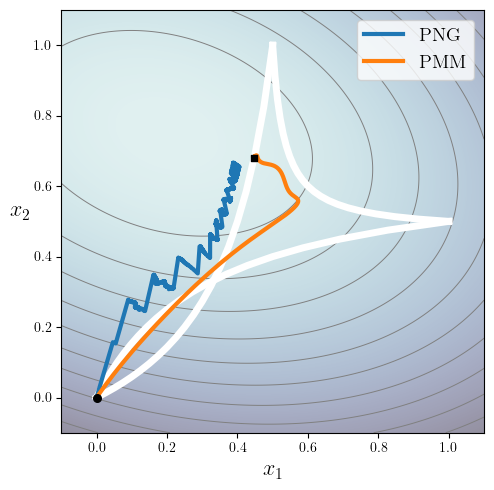

In [29]:
# plot heatmap
fig, ax = plot_heatmap(f0_ns, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), cmap=cmap, alpha=0.5)

# plot Pareto set
plt.plot(xs1, ys1, c='white', linewidth=5)
plt.plot(xs2, ys2, c='white', linewidth=5)
plt.plot(xs3, ys3, c='white', linewidth=5)

# plot trajectories
plt.plot(X_png_ns[:,0], X_png_ns[:,1], linewidth=3, label=r'PNG', zorder=5)
plt.plot(X_pmm_ns[:,0], X_pmm_ns[:,1], linewidth=3, label=r'PMM', zorder=6)

# plot initial and optimal
plt.scatter([OPT_ns[0]], [OPT_ns[1]], c='black', s=25, zorder=7, marker=',')
plt.scatter([x0_ns[0]], [x0_ns[1]], c='black', s=30, zorder=7)

plt.legend(fontsize=14) 
plt.show()